# <div align="center"> Исследоваие успешности видеоигр </div>

## Основная задача
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Данные
В наличии данные до 2016 года.<p>Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<p>
<b><u>Переменные в датасете games:</u></b><br>
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаги выполнения проекта
### [Шаг 1. Открыть файл с данными и изучить общую информацию](#step1)
### [Шаг 2. Подготовить данные](#step2)
- Проверить корректность данных.
- Преобразовать данные в нужные типы.
- Обработать пропуски.
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### [Шаг 3. Провести исследовательский анализ данных](#step3)
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- Взять данные за соответствующий актуальный период (Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы).
- Определить, какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Оценить разницу в продажах и в средних продажах на разных платформах.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Соотнесьти выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Опрелелить, выделяются ли жанры с высокими и низкими продажами?

### [Шаг 4. Составить портрет пользователя каждого региона](#step4)
<u>Определить для пользователя каждого региона (NA, EU, JP):</u>
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### [Шаг 5. Проверить гипотезы](#step5)
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.
<u>Пояснить:</u>
- Как я сформулировала нулевую и альтернативную гипотезы;
- Какой критерий применила для проверки гипотез и почему.

### [Шаг 6. Написать общий вывод](#step6)

## <a id='step1'> Шаг 1. Открыть файл с данными и изучить общую информацию </a>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
sns.set_style("ticks")
plt.rcParams['font.size'] = '12'

In [8]:
df = pd.read_csv('datasets/4_games.csv', sep=",")
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датасет содержит 11 переменных и 16715 наблюдений. В некоторых переменных присутствуют пустые значения, тип некоторых переменных - float, что неудобно для анализа. Требуется предобработка.

## <a id='step2'> Шаг 2. Подготовить данные </a>

Проверим данные на наличие дубликатов

In [10]:
if df.duplicated().sum() > 0:
    print('Дубликатов в таблице:',df.duplicated().sum())
else:
    print('Дубликаты отсутствуют')

Дубликаты отсутствуют


Приведем названия столбцов к нижнему регистру

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Преобразование типов данных + обработка пропусков

В несколько переменных присутствуют пропуски. Они могли появиться вследствие сбора данных из разных источников с разной структурой информации, вследствие отсутвия данных по непопулярным играм или вследствие некачественного парсинга. Данные по названию, году, жанру и рейтингу должны быть по всем играм, поэтому пропуски наводят на мысль о неаккуратно собранных данных. Данные по оценкам критиков и пользователей вполне могут отсутствовать из-за малого количества оценков для подсчета среднего или из-за малой популярности игры.

В данных есть 2 наблюдения с неизвестным названием и жанром игры. Это крайне важные параметры, поэтому лучше пренебречь неточной информацией. Удалим их.

In [12]:
df.dropna(subset = ['name'], inplace = True)
df.reset_index(drop=True, inplace=True)

Игры обычно выходят на разных платформах в одно время (по крайней мере, один год). Заполним пропуски исходя из этого предположения.

In [13]:
year_mean = df.groupby('name').agg({'year_of_release' : 'mean'})
 
for name in year_mean.index:
    df.loc[df['name'] == name,'year_of_release'] = df.loc[df['name'] == name,'year_of_release'
                                            ].fillna(year_mean.loc[name, 'year_of_release'])

Поскольку невозможно привести к интервальному типу переменную с пропусками (от которых мы не хотим полностью избавляться), округлим переменную "год", чтобы сделать ее отображение на графиках визуально приятнее.

In [20]:
df['year_of_release'] = round(df['year_of_release'])

В оценках пользователей есть значение tbd, это - to be determined (будет определен позже), используется, когда оценок слишком мало для формирования усредненной оценки

In [15]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN

df['user_score'] = pd.to_numeric(df['user_score'])

Вероятнее всего, рейтинг, как и год у игр на разных платформах одинаковый. Замним пропуски исходя из этого предположения. Оставшиеся пропуски переименуем в 'unknown'. Это удобно, ведь мы имеем дело с номинальной переменной.<br> В рейтинге также встречается обозначение K-A (Kids to Adults), согласно википедии оно устарело и вместо него применяется E (Everyone). Заменим K-A на E.

In [16]:
rating_mean = df.pivot_table(index='name',values='rating', aggfunc='first')
 
for name in rating_mean.index:
    df.loc[df['name'] == name,'rating'] = df.loc[df['name'] == name,'rating'
                                            ].fillna(rating_mean.loc[name, 'rating'])
    
df['rating'] = df['rating'].fillna('unknown')
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'

Проверим, как преобразились данные

In [17]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Часть пропусков мы убрали. Остальные данные оставим как есть, это не помешает анализу.

#### Посчитаем суммарные продажи во всех регионах

In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


## <a id='step3'> Шаг 3. Провести исследовательский анализ данных </a> 

#### Выпуск игр в разные годы

Посмотрим на общее распределение выпуска игр по годам

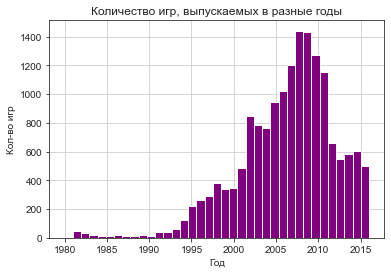

In [22]:
df['year_of_release'].plot(
    kind='hist', bins=(37),color=['purple'],title='Количество игр, выпускаемых в разные годы')
plt.xlabel('Год')
plt.ylabel('Кол-во игр')
plt.grid()
plt.show()

Индустрия игр стабильно росла начиная с 1992 по 2007, но затем начала стремительно падать. Поскольку, мы строим прогноз на 2017 год, вероятно, будет корректнее анализировать данные начиная с периода начала снижения или позднее. Подумаем об этом, но сначала посмотрим, как менялись продажи по разнымым платформам.

Продажи начали падать в конце нулевых - когда появились iphone и другие модели смартфонов. Справедливо предположить, что мобильные игры каннибализировали игры на приставках.

#### Распределение суммарных продаж игр на топовых платформах по годам

Первоначально определим топовые платформы. Для этого построим график с суммарными продажами каждой платформы.

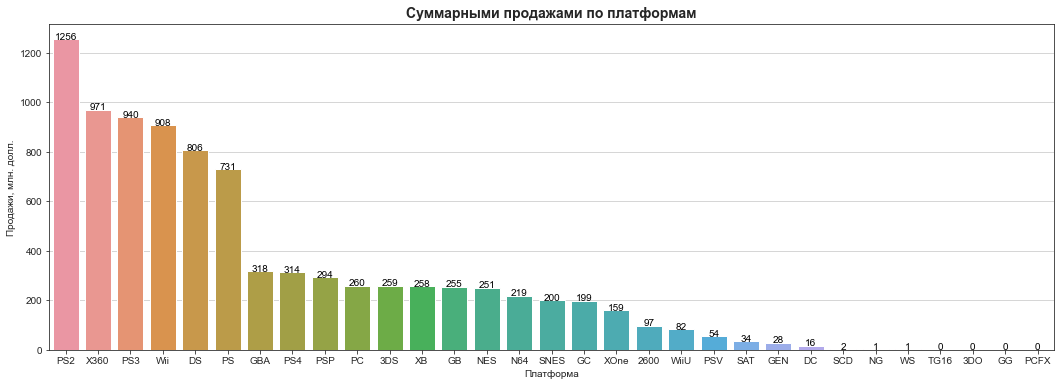

In [25]:
# Сгруппируем платформы по суммарным продажам 
# genre взято для отображения количества проданных игр
big_platforms = df.groupby('platform').aggregate({'total_sales':'sum'}).sort_values(
                                                             by='total_sales', ascending=False).reset_index()
big_platforms.columns=['platform','total_sales']


# Построим график со средними продажами по жанрам.
fig, ax = plt.subplots(figsize=(18, 6))

g = sns.barplot(x='platform', y='total_sales', data=big_platforms, ax=ax)

for index, row in big_platforms.iterrows():
    g.text(index, row['total_sales'], round(row['total_sales']), color='black', ha="center")
    

plt.title('Суммарными продажами по платформам', weight='bold').set_fontsize('14')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. долл.')
plt.xticks(rotation=0)
ax.yaxis.grid(True)
plt.show()

Наибольший отрыв между платформами PS=731 и GBA=318. Установим фильтр в & total_sales > 730

In [46]:
# Сгруппируем продажи игр на популярных платформах по годам
big_platforms = df.groupby('platform').aggregate({'total_sales':'sum'}).query('total_sales > 730'
                                                                ).sort_values(by='total_sales', ascending=False)

top_platforms = df.query('platform in @big_platforms.index')
top_platforms.pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,0.48,NaN,NaN


Nintendo DS появилась в 2004 году. Видимо, в данных ошибка, и никаких продаж на 0.2 млн долларов у этой платформы в 1985 году не было. Удалим соответствующие данные.

In [72]:
len(df.query('(year_of_release == 1985 & platform == "DS"))

1

Всего одно наблюдение.

In [82]:
df = df.query('(year_of_release != 1985 & platform == "DS") | (platform != "DS")')

Построим таблицу заново

In [83]:
# Сгруппируем продажи игр на популярных платформах по годам
big_platforms = df.groupby('platform').aggregate({'total_sales':'sum'}).query('total_sales > 730'
                                                                ).sort_values(by='total_sales', ascending=False)

top_platforms = df.query('platform in @big_platforms.index')
top_platforms.pivot_table('total_sales', index='year_of_release', columns='platform', aggfunc='sum')

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994.0,NaN,6.03,NaN,NaN,NaN,NaN
1995.0,NaN,35.96,NaN,NaN,NaN,NaN
1996.0,NaN,94.70,NaN,NaN,NaN,NaN
1997.0,NaN,136.17,NaN,NaN,NaN,NaN
1998.0,NaN,169.49,NaN,NaN,NaN,NaN
1999.0,NaN,144.53,NaN,NaN,NaN,NaN
2000.0,NaN,96.37,39.17,NaN,NaN,NaN
2001.0,NaN,35.59,166.43,0.48,NaN,NaN
2002.0,NaN,6.67,208.36,NaN,NaN,NaN


Узнаем среднее время жизни топовых платформ

In [84]:
top_platforms1994 = top_platforms.pivot_table('total_sales', index='year_of_release', columns='platform',
                                              aggfunc='sum')

In [87]:
# Запишем названия колонок (то есть платформы) в список
columns1994 = top_platforms1994.columns.to_list()

# Запишем в список длину непустых значений по каждой колонке, для этого в цикле удалим пустые сроки для каждой из платформ
list_len=[]
for i in columns1994:
    top_platforms1994_1 = top_platforms1994.dropna(subset=[i])
    list_len.append(len(top_platforms1994_1[i]))

In [88]:
top_platforms1994_len

,index,len
0,PS3,13
1,PS2,12
2,X360,12
3,Wii,11
4,DS,10
5,PS,10


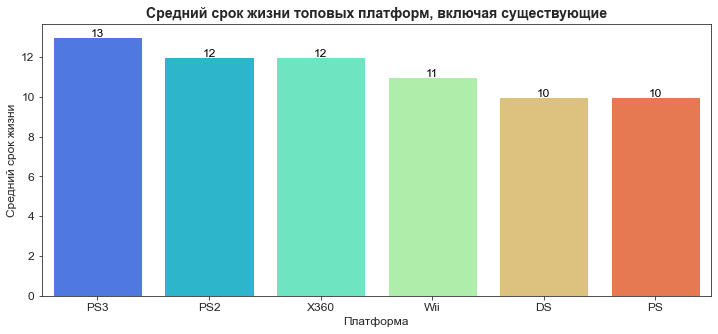

In [90]:
# Создадим df по платформам и их сроку жизни, транспонируем для удобства построения графика
data1994 = [list_len]
top_platforms1994_len = pd.DataFrame(data1994, columns=columns1994).transpose()
top_platforms1994_len.columns=['len']
top_platforms1994_len = top_platforms1994_len.sort_values(by='len', ascending=False).reset_index()

# Построим график
fig, ax = plt.subplots(figsize=(12, 5))

g = sns.barplot(x='index', y='len', data=top_platforms1994_len, ax=ax, palette='rainbow')

for index, row in top_platforms1994_len.iterrows():
    g.text(index, row['len'], round(row['len'], 2), color='black', ha="center")
    

plt.title('Средний срок жизни топовых платформ, включая существующие', weight='bold').set_fontsize('14')
plt.xlabel('Платформа')
plt.ylabel('Средний срок жизни')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
plt.show()

In [91]:
print('Средний срок жизни по топовым платформам, включая еще существующие {:.2f}'.format(sum(list_len) / len(list_len)),'лет')

Средний срок жизни по топовым платформам, включая еще существующие 11.33 лет


Посмотрим отдельно на топовые платформы, которые перестали существовать.

In [92]:
# Возьмем только платформы, по которым есть данные за 2016 год (то есть "живые" платформы)
top_platforms1994_2 = top_platforms1994.query('year_of_release == 2016').dropna(axis=1)
columns1994_2 = top_platforms1994_2.columns.to_list()
# Оставим в листе только те платформы, которые не входят в лист "живых платформ"
columns1994_2 = [x for x in columns1994 if x not in columns1994_2]
columns1994_2

['DS', 'PS', 'PS2']

In [93]:
# Запишем в список длину непустых значений по каждой колонке, для этого в цикле удалим пустые сроки для каждой из платформ
list_len_2=[]
for i in columns1994_2:
    top_platforms1994_1 = top_platforms1994.dropna(subset=[i])
    list_len_2.append(len(top_platforms1994_1[i]))
list_len_2

[10, 10, 12]

In [99]:
top_platforms1994_len_2 = top_platforms1994_len_2.sort_values(by='len', ascending=True).reset_index()
top_platforms1994_len_2

,index,len
0,DS,10
1,PS,10
2,PS2,12


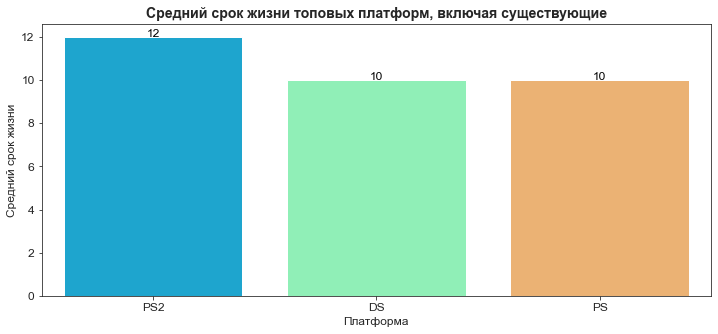

In [103]:
# Создадим df по платформам и их сроку жизни, транспонируем для удобства построения графика
data1994_2 = [list_len_2]
top_platforms1994_len_2 = pd.DataFrame(data1994_2, columns=columns1994_2).transpose()
top_platforms1994_len_2.columns=['len']
top_platforms1994_len_2 = top_platforms1994_len_2.sort_values(by='len', ascending=False).reset_index()

# Построим график
fig, ax = plt.subplots(figsize=(12, 5))

g = sns.barplot(x='index', y='len', data=top_platforms1994_len_2, ax=ax, palette='rainbow')

for index, row in top_platforms1994_len_2.iterrows():
    g.text(index, row['len'], round(row['len'], 2), color='black', ha="center")
    

plt.title('Средний срок жизни топовых платформ, включая существующие', weight='bold').set_fontsize('14')
plt.xlabel('Платформа')
plt.ylabel('Средний срок жизни')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
plt.show()

In [104]:
print('Средний срок жизни по топовым платформам, которые перестали существовать: {:.2f}'.format(sum(list_len_2) / len(list_len_2)),'лет')

Средний срок жизни по топовым платформам, которые перестали существовать: 10.67 лет


Средний срок жизни по топовым платформам, включая еще существующие, составил 11.33 лет. Можно учитывать цифру по уже переставшим существовать платформам (10.67), но индустрия стремительно меняется, продажи падают, поэтому мы полагаем, что в первую очередь стоит обращать внимание на цифру за современный период. Несмотря на то, что эти данные нестабильны и будут изменяться в будущем, они актуальны и отражают современную тенденцию: срок жизни платформ растет.<p>Можно сделать общий вывод и назвать средним сроком жизни всех топовых платформ числовой диапазон 10-12 лет, 11.33 лет для современных еще существующих платформ и 10.67 лет - для уже переставших существовать.

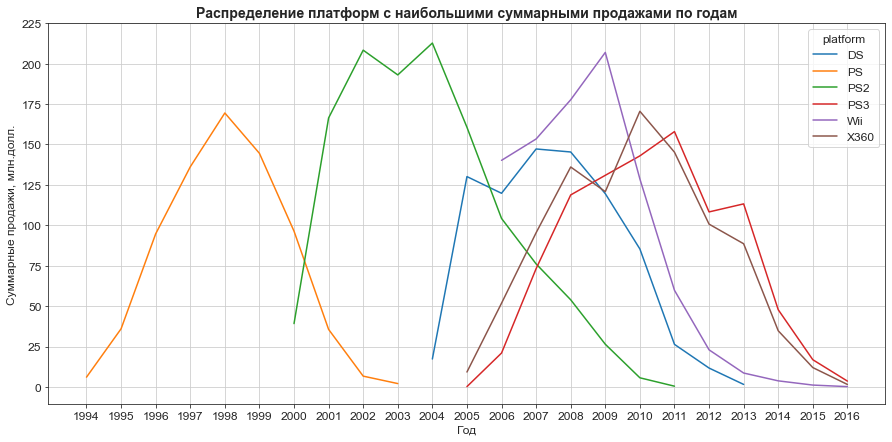

In [106]:
# Построим график распределения топовых платформ по годам
sns.set_style("ticks")
top_platforms.query('year_of_release >= 1994').pivot_table('total_sales', index='year_of_release', columns='platform'
                    , aggfunc='sum').plot(figsize=(15,7))
plt.title('Распределение платформ с наибольшими суммарными продажами по годам', weight='bold').set_fontsize('14')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн.долл.')
plt.xticks(np.arange(1994, 2017, 1))
plt.yticks(np.arange(0, 250, 25))
plt.grid()
plt.show()

В 2015 продажи игр на популярных когда-то платформах снизились до рекордных цифр, но еще не упали (не берем 2016, так как данные еще неполные). Думаю, будет логичным выбрать для анализа период начиная с 2012 - первое снижение по еще нынеживущим платформам X360 и PS3, а концом назначить 2015, опять же, из-за неполных сведений по 2016 году. Данные за 2016 год могут быть наполнены неравномерны, что исказит результаты. 

In [108]:
df_recent = df.query('2012 <= year_of_release <= 2015 ')
df_recent.reset_index(drop=True, inplace=True)
df_recent

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2392,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
2393,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
2394,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
2395,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


#### Продажи по разным платформам 

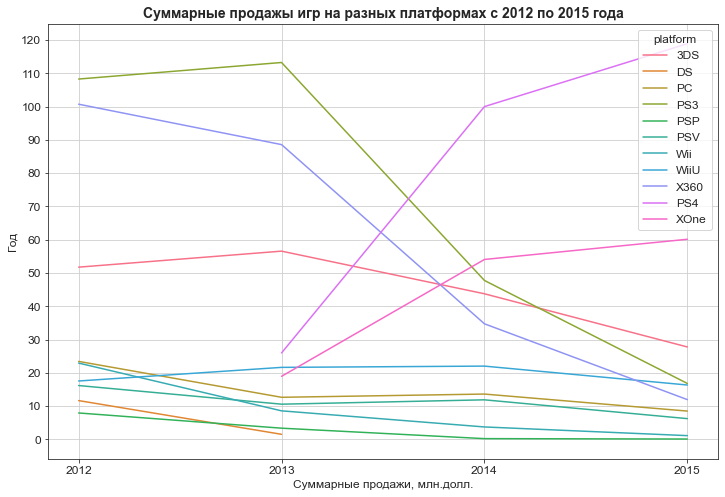

In [116]:
recent_pivot = df_recent.pivot_table(index=['year_of_release','platform'], values='total_sales', aggfunc='sum'
                                    ).reset_index()


sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=recent_pivot)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title('Суммарные продажы игр на разных платформах с 2012 по 2015 года', weight='bold').set_fontsize('14')
plt.xlabel('Суммарные продажи, млн.долл.')
plt.ylabel('Год')
plt.xticks(np.arange(2012, 2016, 1))
plt.yticks(np.arange(0, 130, 10))
plt.grid()
plt.show()

Из всех платформ только PS4 и XOne находятся в фазе роста, поэтому их можно назвать потенциально прибыльными. PS3, X360 и 3DS - стремительно снижаются, WiiU - стагнирует, DS - перестала существовать, платформы 3DS, PC, PSP, PSV, Wii и WiiU медленно снижаются и приближаются к нулю

#### График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

In [117]:
index_sort = df.mean().sort_values().index
index_sort

Index(['other_sales', 'jp_sales', 'eu_sales', 'na_sales', 'total_sales',
       'user_score', 'critic_score', 'year_of_release'],
      dtype='object')

In [118]:
df_sorted = df[index_sort]

In [ ]:
df

In [ ]:
# plotting the boxplot for the data 
sns.boxplot(data = df_sorted)
  
# Label x-axis
plt.xlabel('Desserts')
plt.set_size_inches(12, 5)
# labels y-axis
plt.ylabel('perference of people')
#plt.yticks(np.arange(0, 130, 10))

Изучим разницу в продажах на разных платформах

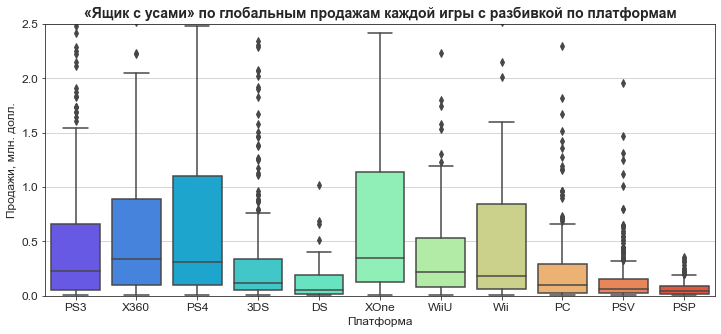

In [114]:
fig,ax = plt.subplots()
sns.boxplot(x='platform', y='total_sales', data=df_recent, palette='rainbow' , ax=ax)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.ylim(0, 2.5)
plt.title('«Ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам', weight='bold').set_fontsize('14')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. долл.')
ax.yaxis.grid(True)
plt.show()

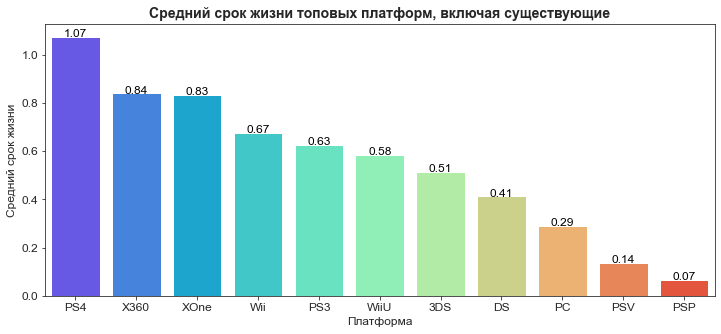

In [113]:
mean_total_sales = df_recent.groupby('platform').aggregate({'total_sales':'mean'}).sort_values('total_sales'
                                                                                , ascending=False).reset_index()

# Построим график
fig, ax = plt.subplots(figsize=(12, 5))

g = sns.barplot(x='platform', y='total_sales', data=mean_total_sales, ax=ax, palette='rainbow')

for index, row in mean_total_sales.iterrows():
    g.text(index, row['total_sales'], round(row['total_sales'], 2), color='black', ha="center")
    

plt.title('Средний срок жизни топовых платформ, включая существующие', weight='bold').set_fontsize('14')
plt.xlabel('Платформа')
plt.ylabel('Средний срок жизни')
plt.xticks(rotation=0)
ax.yaxis.grid(False)
plt.show()

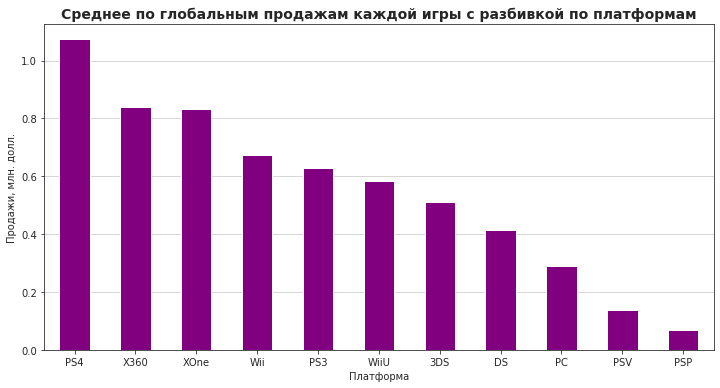

In [32]:
fig,ax = plt.subplots()
df_recent.groupby('platform').aggregate({'total_sales':'mean'}).sort_values('total_sales', ascending=False
                 ).plot(kind='bar',figsize=(12,6), legend=False, color=['purple'], ax=ax)
plt.title('Среднее по глобальным продажам каждой игры с разбивкой по платформам', weight='bold').set_fontsize('14')
plt.xlabel('Платформа')
plt.ylabel('Продажи, млн. долл.')
plt.xticks(rotation=0)
ax.yaxis.grid(True)
plt.show()

Глобальные продажи игр различались по платформам. Наибольший разброс значений наблюдался у XOne, PS4, X360, Wii и PS3: это массовые платформы, на них выходили популярных и непопулярные игры с суммарными продажами от 0 до 2.4 млн.долл. Игры на платформах WiiU, 3DS, PC, DC, PSC, PSP были не так успешны, их глобальные продажи составили от 0 до 1.25 млн.долл.<p>Вариативность медиан невысокая. Медианные продажи по каждой из платформ лежат в пределах от 0.05 млн.долл. до 0.35 млн.долл., многие приближены к 0.2 млн.долл.<p>Средние различаются сильнее: от 0.05 до 1.1. Среднее по продажам выше всех у PS4, далее идут X360 и XOne, затем Wii, PS3, WiiU, 3DS и DS, ниже всех продажи у - PC, DSV и PSP.

На вершине рейтинга по суммарным продажам выпущенных игр под определенную платформу, располагаются как новые платформы (PS4 и XOne, выпущенные в 2013 году), так и более старые платформы (X360, Wii, PS3, выпущенные в 2005, 2006, 2006 годах соответсвенно), поэтому можно утверждать, что год выпуска не является ключевой причиной успеха платформы. Предположу, что разница формируется за счет разной популярности, удобности платформ. Спрос рождает предложение, под более популярные и продаваемые платфомы выпускается большие игр. 

#### Как влияют на продажи отзывы пользователей и критиков внутри одной популярной платформы

Изучим PS4, это самая популярная платформа последних лет, исходя из средних и сумарных продаж

In [33]:
# Создадим таблицу для PS4: оценки критиков и пользователей и средние суммарные продажи
ps4_ratings = df_recent.query('platform == "PS4"')[['critic_score','user_score','total_sales']]
ps4_ratings

,critic_score,user_score,total_sales
2,NaN,NaN,14.63
6,97.0,8.3,12.62
14,82.0,4.3,8.58
17,NaN,NaN,7.98
18,83.0,5.7,7.66
...,...,...,...
2157,NaN,NaN,0.02
2194,NaN,NaN,0.01
2224,NaN,NaN,0.01
2265,NaN,NaN,0.01


Построим диаграмму рассеяния

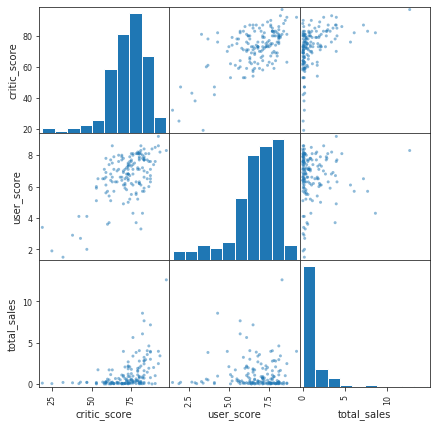

In [55]:
pd.plotting.scatter_matrix(ps4_ratings, figsize=(7, 7))
plt.show()

Для PS4 пары user score, critics score и user score, total_sale рассеяны вполне нормально, в то время как в паре critics score, total_sale наблюдается явная тенденция: только у высоко оцененных критиками играх есть высокие продажи.

Теперь изучим корреляцию

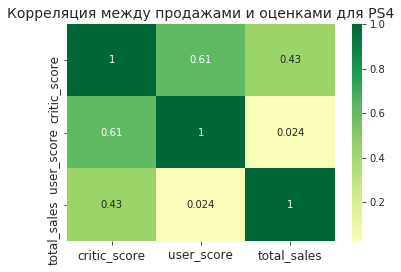

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(ps4_ratings.corr(), xticklabels=ps4_ratings.corr().columns, yticklabels=ps4_ratings.corr().columns, 
            cmap='RdYlGn', center=0, annot=True)

plt.title('Корреляция между продажами и оценками для PS4', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Для PS4 корреляция между оценками критиков и оценками пользователей составляет 0.61, что означает среднюю прямую связь между переменными. Между оценками критиков и продажами также наблюдается прямая связь, но она слабая (0.43). Между оценками пользователей и продажами корреляция практически отсутствует. (0.024)

Критики и пользователи оценивают платформы достаточно схожим образом, что означает, что критики тоже люди :)<br>Оценки критиков слабо, но связаны с продажами, оценки пользователей - совсем нет. Возможно, некоторые пользователи ориентируются на оценки критиков при покупке игр (что влияет на суммарные продажи), или, возможно некоторые критики ориентируются на популярность игр (то есть суммарные продажи) при выставлении оценки. Односторонне влияние установить нельзя, мы имеем дело с корреляцией, а не каузацией, к тому же данные по обеим переменных собираются в одно время, а, значит, всегда будет иметь место взаимовлияние.

#### Соотнесите выводы с продажами игр на других платформах.

Посмотрим на другие платформы

 Платформа: PS3 
 Число наблюдений: 456



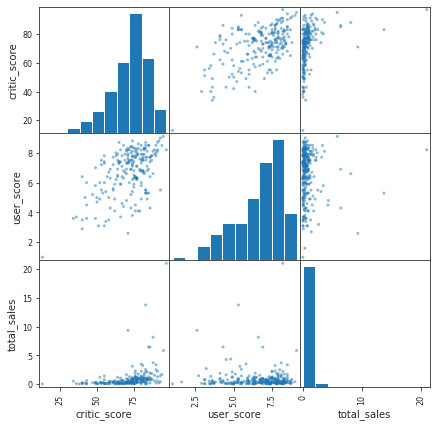

 Платформа: X360 
 Число наблюдений: 281



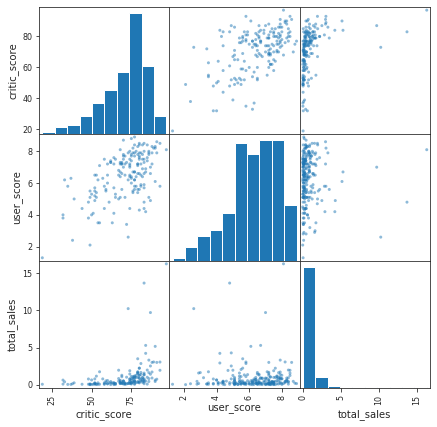

 Платформа: 3DS 
 Число наблюдений: 351



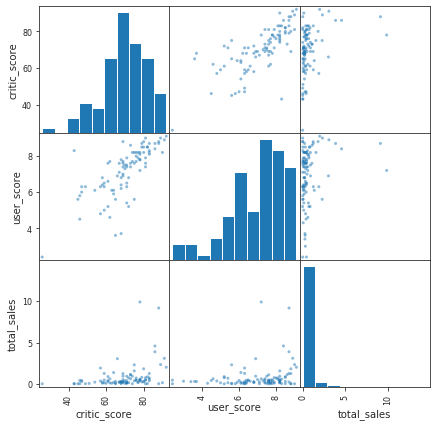

 Платформа: XOne 
 Число наблюдений: 160



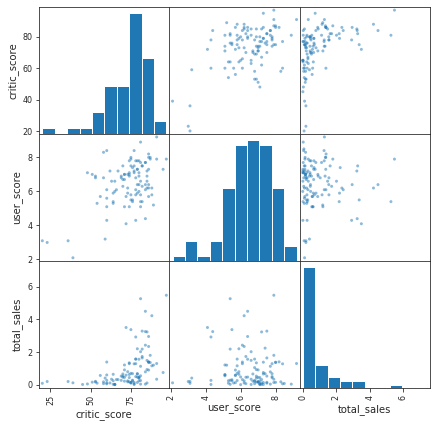

 Платформа: WiiU 
 Число наблюдений: 133



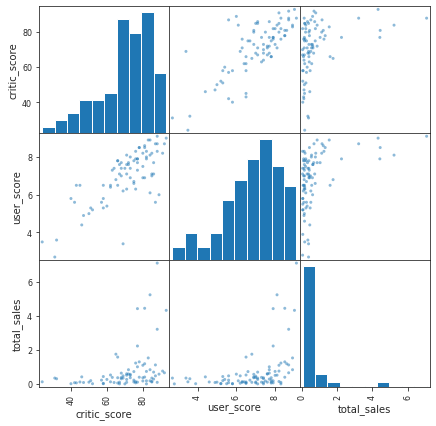

 Платформа: PC 
 Число наблюдений: 201



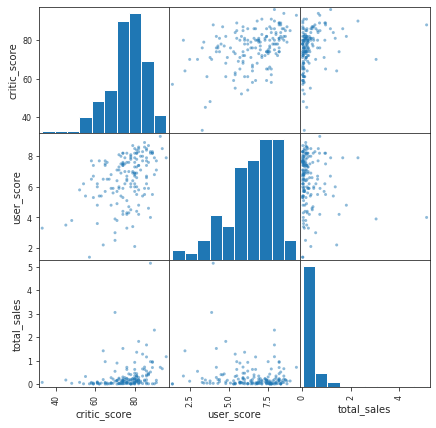

 Платформа: PSV 
 Число наблюдений: 326



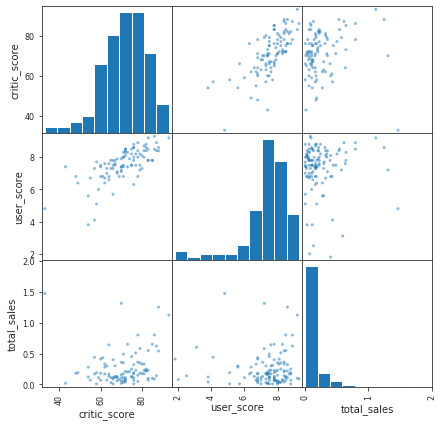

In [38]:
# Получим лист платформ, за исключением PS4, которую мы уже изучили
platforms_recent = df_recent.query('platform != "PS4"')['platform'].unique()

# Напишем цикл для создания диаграмм рассеяния для каждой платформы
# Сделаем это только для платформ, где набирается хотя бы 30 непропущенных наблюдений
for i in platforms_recent:
    platforms_pivot = df_recent.query('platform == @i'
                                     )[['critic_score','user_score','total_sales']]
    # У нас много пропущенных значений в переменных critic_score и critic_score. Выведем диаграммы только
    # для тех платформ, в которых есть хотя бы 30 наблюдений для параметрического анализа
    if len(platforms_pivot.query('critic_score > 0')['critic_score']) > 30 and len(platforms_pivot.query('user_score > 0')['user_score']) > 30:
        print('\033[1m Платформа:', i,'\033[0m')
        print(' Число наблюдений:', len(platforms_pivot))
        print('')
        pd.plotting.scatter_matrix(platforms_pivot, figsize=(7, 7))
        plt.show()

На диаграммах рассеяния заметны некоторые скопления точек, напоминающие тренд, особенно у XOne для critics_score & total_sales, у WIiU для critics_score & total_sales, user_score & total_sales, у PSV для critics_score & total_sales, user_score & total_sales.<br>Изучим коэффициенты корреляции, чтобы сказать наверняка.

 Платформа: PS3 


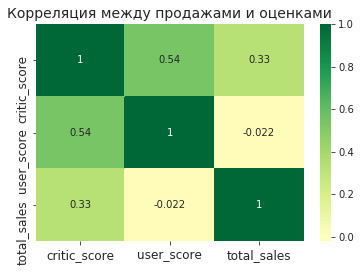

 Платформа: X360 


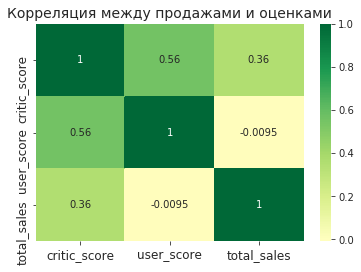

 Платформа: 3DS 


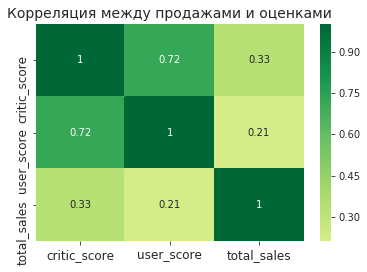

 Платформа: XOne 


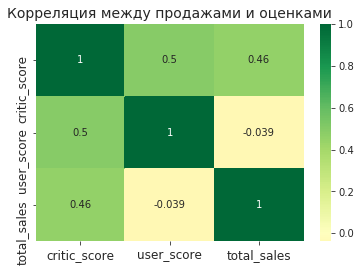

 Платформа: WiiU 


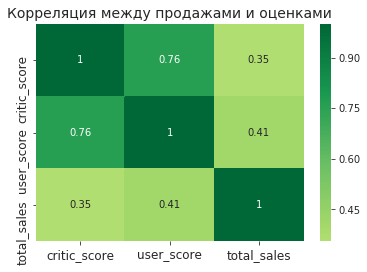

 Платформа: PC 


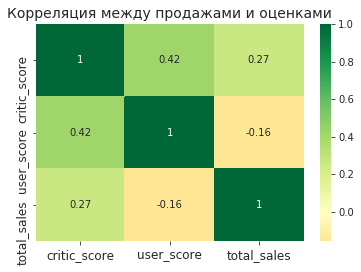

 Платформа: PSV 


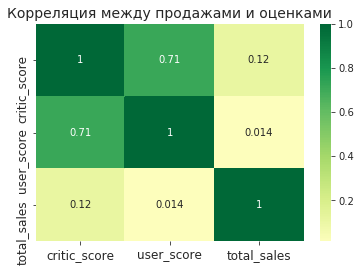

In [39]:
# Построим таблицы корреляции
for i in platforms_recent:
    platforms_pivot = df_recent.query('platform == @i& platform != "PS4"'
                                     )[['critic_score','user_score','total_sales']]
    
    # У нас много пропущенных значений в переменных critic_score и critic_score. Выведем таблицы только
    # для тех платформ, в которых есть хотя бы 30 наблюдений для параметрического анализа
    if len(platforms_pivot.query('critic_score > 0')['critic_score']) > 30 and len(platforms_pivot.query('user_score > 0')['user_score']) > 30:
        print('\033[1m Платформа:', i, '\033[0m')
        plt.figure(figsize=(6,4))
        sns.heatmap(platforms_pivot.corr(), xticklabels=platforms_pivot.corr().columns
                    , yticklabels=platforms_pivot.corr().columns, cmap='RdYlGn', center=0, annot=True)

        plt.title('Корреляция между продажами и оценками', fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

<li>Между продажами и оценками критиков слабая прямая корреляция у XOne (0.46), X360 (0.36), WiiU (0.35), PS3 (0.33) и 3DS (0.33), очень слабая прямая корреляция у PC (0.27) и PSV (0.12).
<li>Между продажами и оценками пользователей слабая прямая корреляция у WiiU (0.41), очень слабая прямая у 3DS (0.21), очень слабая обратная у PC (-0.16), практически отсутствует у PSV (0.014), PS3 (-0.022) XOne (-0.039).
<li>Между оценками критиков и оценками пользователей высокая прямая корреляция у WiiU (0.76), 3DS (0.72) и PSV (0.71), средняя прямая корряляция у X360 (0.56), PS3 (0.54) и XOne (0.5), слабая прямая корреляция у PC (0.42).<p><p>
В целом, можно сказать, что у многих платформ высокая прямая корреляция между оценками критиков и оценками пользователей, слабая праямая корреляция между продажами и оценками критиков, и практически отсутствует между продажами и оценками пользователей. Таким образом, продажи слабо связаны с оценками критиков (характер связи прямой), и почти не связаны с оценками пользователей.

Как уже было сказано, критики и пользователи оценивают платформы достаточно схожим образом, что означает, что критики тоже люди :)<br>Оценки критиков слабо, но связаны с продажами, оценки пользователей - совсем нет. Возможно, некоторые пользователи ориентируются на оценки критиков при покупке игр (что влияет на суммарные продажи), или, возможно некоторые критики ориентируются на популярность игр (то есть суммарные продажи) при выставлении оценки. Односторонне влияние установить нельзя, мы имеем дело с корреляцией, а не каузацией, к тому же данные по обеим переменных собираются в одно время, а, значит, всегда будет иметь место взаимовлияние.

#### Распределение игр по жанрам: самые прибыльные и неприбыльные жанры

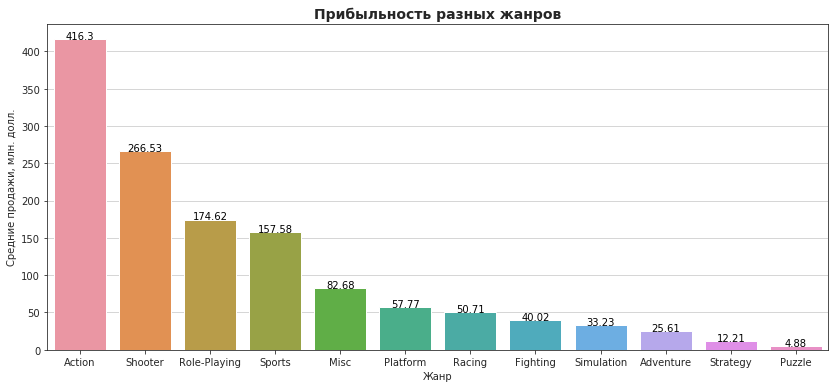

In [40]:
# Сгруппируем данные продаж по жанрам. Возьмем среднее и сумму по глобальным продажам
genres_by_sales = df_recent.groupby('genre').aggregate({'total_sales':['sum']}).sort_values(('total_sales','sum'), ascending=False)
genres_by_sales = genres_by_sales.reset_index()
genres_by_sales.columns = ['genre','total_sales_sum']

# Построим график со средними продажами по жанрам.
fig, ax = plt.subplots(figsize=(14, 6))

g = sns.barplot(x='genre', y='total_sales_sum', data=genres_by_sales, ax=ax)

for index, row in genres_by_sales.iterrows():
    g.text(index, row['total_sales_sum'], round(row['total_sales_sum'],2), color='black', ha="center")

plt.title('Прибыльность разных жанров', weight='bold').set_fontsize('14')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи, млн. долл.')
ax.yaxis.grid(True)
plt.show()

Жанр Action первый по суммарным продажам (416.30 млн.долл.), после него идут Shooter (266.53 млн.долл.), Role-Playing (174.62 млн.долл.) и Sports (157.58 млн.долл.): у игр такого жанра высокая прибыльность. Следующие в рейтинге Misc (82.68 млн.долл.), Platform (57.77 млн.долл.) и Racing (50.71 млн.долл.). Наименее экономически успешны жанры Fighting (40.02 млн.долл.), Simulation (33.23 млн.долл.), Adventure (25.61 млн.долл.), Strategy (12.21 млн.долл.), замыкает топ Puzzle с суммарными продажами 4.88 млн.долл.

## <a id='step4'> Шаг 4. Составить портрет пользователя каждого региона </a> 

#### Определите для пользователя каждого региона (NA, EU, JP):<br> Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [9]:
platforms = df.groupby('platform').aggregate({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)
platforms['pct'] = platforms['na_sales'] / platforms['na_sales'].sum()
platforms = platforms.reset_index()
platforms.loc[5,'pct'] = platforms.loc[5:,'pct'].sum()
platforms.loc[5,'platform'] = 'Others'
platforms = platforms.head(6)
platforms

,platform,na_sales,pct
0,X360,602.47,0.136907
1,PS2,583.84,0.132674
2,Wii,496.90,0.112917
3,PS3,393.49,0.089418
4,DS,382.40,0.086898
5,Others,336.52,0.441186


 Топ-5 популярных платформ для жителей Северной Америки по суммарным продажам 


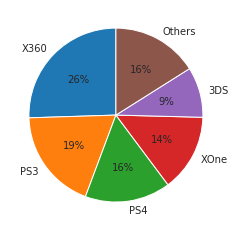

 Топ-5 популярных платформ для жителей Европы по суммарным продажам 


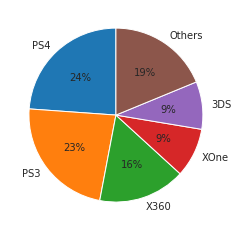

 Топ-5 популярных платформ для жителей Японии по суммарным продажам 


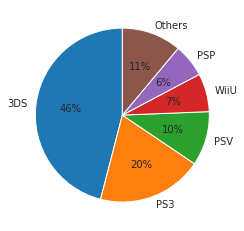

In [41]:
# Сделаем цикл для подсчета значений и отрисовки графиков для каждого региона
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    # Сгруппируем плафтормы по суммарным глобальным продажам, вычислим доли
    platforms = df_recent.groupby('platform').aggregate({i:'sum'}).sort_values(by=i, ascending=False)
    platforms['pct'] = platforms[i] / platforms[i].sum()
    platforms = platforms.reset_index()
    # Оставим первые 5 платформ, остальные занесем в "Другое"
    platforms.loc[5,'pct'] = platforms.loc[5:,'pct'].sum()
    platforms.loc[5,'platform'] = 'Others'
    platforms = platforms.head(6)
    
    # Напечатаем заголовок
    if i=='na_sales':
        print('\033[1m Топ-5 популярных платформ для жителей Северной Америки по суммарным продажам \033[0m')
    elif i=='eu_sales':
        print('\033[1m Топ-5 популярных платформ для жителей Европы по суммарным продажам \033[0m')
    else:
        print('\033[1m Топ-5 популярных платформ для жителей Японии по суммарным продажам \033[0m')
        
    # Выведем график
    plt.pie(platforms['pct'], labels=platforms['platform'],
        autopct=lambda p: '{:.0%}'.format(p * platforms['pct'].sum()/100),startangle=90)
    plt.show()

Жители Северной Америки предпочитают играть в компьютерные игры на X360 (26%), PS3 (19%), PS4 (16%), XOne (14%), 3DS (9%), еще 16% пользователей играют на других платформах. Топ-5 платформ для Европы следуюший: PS4 (24%), PS3 (23%), X360 (16%), XOne (9%), 3DS (9%) и 19% предпочитают другие платформы. Для Японии Топ-5 платформ следующий: 3DS (46%), PS3 (20%), PSV (10%), WiiU (7%), PSP (6%), 11% пользователей используют другие платформы.

Для ответа на вопрос о первопричинах отличий популярности платформ между разными регионами требуется дополнительное исследование. Могу лишь предположить, что японцы не любят западные платформы (X360 и XOne  отMicrosoft) и любят отечественные (все остальные). Также технология 3D достаточно популярна в Японии, а платформа 3DS способна создавать трехмерный эффект, отсюда любовь к этой платформе. Возможно, дело в финансовом вопросе, и платформа 3DS идеальна по соотношению цена-качество. Или в рекламе. Основываясь на имеющихся данных, однозначно утверждать невозможно.

Сделаем общую таблицу с популярными платформами по регионам

In [42]:
# Сгруппируем экономически успешные платформы (по суммарным продажам) отдельно для каждого региона
platforms_by_na = df_recent.groupby('platform').aggregate({'na_sales':'sum'}).sort_values(by='na_sales', 
                                                                                          ascending=False).head(5)
platforms_by_eu = df_recent.groupby('platform').aggregate({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                                                                          ascending=False).head(5)
platforms_by_jp = df_recent.groupby('platform').aggregate({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                                                                          ascending=False).head(5)

# Проставим индексы, сделаем колонку 'platform' обычной, а не индексовой
platforms_by_na = platforms_by_na.reset_index().head()
platforms_by_eu = platforms_by_eu.reset_index().head()
platforms_by_jp = platforms_by_jp.reset_index().head()

# Добавим неиндексовую колонку с номером индекса
platforms_by_na['index1'] = platforms_by_na.index
platforms_by_eu['index1'] = platforms_by_eu.index
platforms_by_jp['index1'] = platforms_by_jp.index

# Объединим таблицы по регионам
all_sales_region = platforms_by_na.merge(platforms_by_eu, on='index1').merge(platforms_by_jp, on='index1')

# Оставим только колонки с жанрами, переименуем их
all_sales_region = all_sales_region[['platform_x', 'platform_y', 'platform']]
all_sales_region.columns = ['NA', 'EU', 'JP']
# Сделаем колонку с "номером места", превратим в индекс
all_sales_region['TOP'] = [1, 2, 3, 4, 5]
all_sales_region = all_sales_region.set_index('TOP')
print('\033[1m Самые популярные платформы в Америке, Европе и Японии по суммарным продажам \033[0m')
all_sales_region

 Самые популярные платформы в Америке, Европе и Японии по суммарным продажам 


,NA,EU,JP
TOP,,,
1,X360,PS4,3DS
2,PS3,PS3,PS3
3,PS4,X360,PSV
4,XOne,XOne,WiiU
5,3DS,3DS,PSP


Таблица позволяет заметить, что в Северной Америке и Европе предпочитают одни и те же игровые платформы: X360, PS3, PS4, XOne и 3DS. В Японии реже играют на X360, XOne и PS4 и чаще на PSV, WiiU, PSP.

#### Определите для пользователя каждого региона (NA, EU, JP):<br> Самые популярные жанры (топ-5). Поясните разницу.

 Топ-5 популярных жанров для жителей Северной Америки по суммарным продажам 


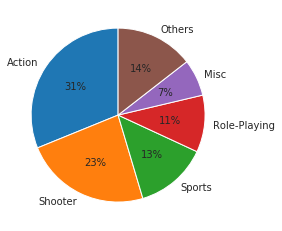

 Топ-5 популярных жанров для жителей Европы по суммарным продажам 


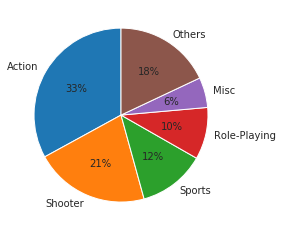

 Топ-5 популярных жанров для жителей Японии по суммарным продажам 


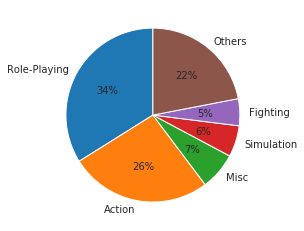

In [43]:
# Сделаем цикл для подсчета значений и отрисовки графиков для каждого региона
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    # Сгруппируем жанры по суммарным глобальным продажам, вычислим доли
    platforms = df_recent.groupby('genre').aggregate({i:'sum'}).sort_values(by=i, ascending=False)
    platforms['pct'] = platforms[i] / platforms[i].sum()
    platforms = platforms.reset_index()
    # Оставим первые 5 жанров, остальные занесем в "Другое"
    platforms.loc[5,'pct'] = platforms.loc[5:,'pct'].sum()
    platforms.loc[5,'genre'] = 'Others'
    platforms = platforms.head(6)
    
    # Напечатаем заголовок
    if i=='na_sales':
        print('\033[1m Топ-5 популярных жанров для жителей Северной Америки по суммарным продажам \033[0m')
    elif i=='eu_sales':
        print('\033[1m Топ-5 популярных жанров для жителей Европы по суммарным продажам \033[0m')
    else:
        print('\033[1m Топ-5 популярных жанров для жителей Японии по суммарным продажам \033[0m')
        
    # Выведем график
    plt.pie(platforms['pct'], labels=platforms['genre'],
        autopct=lambda p: '{:.0%}'.format(p * platforms['pct'].sum()/100),startangle=90)
    plt.show()

Жители Северной Америки предпочитают играть в компьютерные жанров Action (31%), Shooter (23%), Sports (13%), Role-Playing (11%), Misc (7%), еще 14% пользователей играют в игры других жанров. Топ-5 жанров для Европы следуюший:  Action (33%), Shooter (21%), Sports (12%), Role-Playing (10%), Misc (6%), и 18% предпочитают другие жанры. Для Японии Топ-5 жанров следующий: Rolw-Playing (34%), Action (26%), Misc (7%), Simulation (6%), Fighting (%), 22% пользователей играют в другие жанры.

In [44]:
# Сгруппируем экономически успешные жанры (по суммарным продажам) отдельно для каждого региона, сохраним первые 5 наблюдений
genres_na = df_recent.query('na_sales >= 0').groupby('genre').aggregate({'na_sales':'sum'}).sort_values(by='na_sales', 
                                                                                          ascending=False).head(5)
genres_eu = df_recent.query('eu_sales >= 0').groupby('genre').aggregate({'eu_sales':'sum'}).sort_values(by='eu_sales', 
                                                                                          ascending=False).head(5)
genres_jp = df_recent.query('jp_sales >= 0').groupby('genre').aggregate({'jp_sales':'sum'}).sort_values(by='jp_sales', 
                                                                                          ascending=False).head(5)

# Проставим индексы, сделаем колонку 'genres' обычной, а не индексовой
genres_na = genres_na.reset_index().head()
genres_eu = genres_eu.reset_index().head()
genres_jp = genres_jp.reset_index().head()

# Добавим неиндексовую колонку с номером индекса
genres_na['index1'] = genres_na.index
genres_eu['index1'] = genres_eu.index
genres_jp['index1'] = genres_jp.index

# Объединим таблицы по регионам
all_genres_region = genres_na.merge(genres_eu, on='index1').merge(genres_jp, on='index1')

# Оставим только колонки с жанрами, переименуем их
all_genres_region = all_genres_region[['genre_x', 'genre_y', 'genre']]
all_genres_region.columns = ['NA', 'EU', 'JP']
# Сделаем колонку с "номером места", превратим в индекс
all_genres_region['TOP'] = [1, 2, 3, 4, 5]
all_genres_region = all_genres_region.set_index('TOP')
print('\033[1m Самые продаваемые жанры по регионам \033[0m')
all_genres_region

 Самые продаваемые жанры по регионам 


,NA,EU,JP
TOP,,,
1,Action,Action,Role-Playing
2,Shooter,Shooter,Action
3,Sports,Sports,Misc
4,Role-Playing,Role-Playing,Simulation
5,Misc,Misc,Fighting


В Северной Америке и Европе одинаковый топ продаж игр по жанру: Action, Shooter, Sports, Role-Playing, Misc. В Японии другой топ: Role-Playing, Action, Misc, Simulation, Fighting.

#### Определите для пользователя каждого региона (NA, EU, JP):<br> Влияет ли рейтинг ESRB на продажи в отдельном регионе?

 Доли суммарных продажи игр по разным рейтингам в Японии 


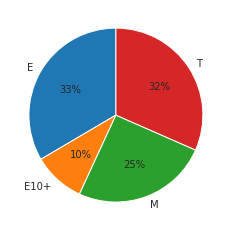

 Доли суммарных продажи игр по разным рейтингам в Европе 


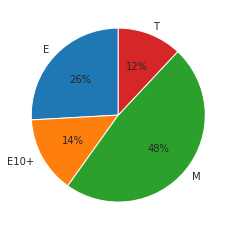

 Доли суммарных продажи игр по разным рейтингам в Северной Америке 


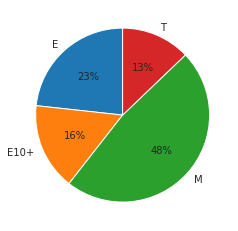

 Доли суммарных продажи игр разных рейтингов по регионам 


,NA,EU,JP
rating,,,
E,0.232714,0.258842,0.334720
E10+,0.161599,0.142461,0.096483
M,0.477273,0.478983,0.252971
T,0.128414,0.119714,0.315827


In [45]:
# Создадим df с колонкой рейтинговы
rating_by_region = pd.DataFrame(['E', 'E10+', 'T', 'M'], columns=['rating'])
# Сделаем цикл для подсчета значений и отрисовки графиков для каждого региона
for i in ['jp_sales', 'eu_sales', 'na_sales']:
    # Сгруппируем рейтинги по суммарным глобальным продажам, вычислим доли
    ratings = df_recent.query('rating != "unknown"').groupby('rating').aggregate({i:'sum'})
    ratings[i] = ratings[i] / ratings[i].sum()
    ratings = ratings.reset_index()
    
    # Напечатаем заголовок
    if i=='na_sales':
        print('\033[1m Доли суммарных продажи игр по разным рейтингам в Северной Америке \033[0m')
    elif i=='eu_sales':
        print('\033[1m Доли суммарных продажи игр по разным рейтингам в Европе \033[0m')
    else:
        print('\033[1m Доли суммарных продажи игр по разным рейтингам в Японии \033[0m')
        
    # Выведем график
    plt.pie(ratings[i], labels=ratings['rating'],
        autopct=lambda p: '{:.0%}'.format(p * ratings[i].sum()/100),startangle=90)
    plt.show()
    # Присоединим к пустой таблице с колонкой рейтингов, чтобы получить общую таблицу по регионам
    rating_by_region = ratings.merge(rating_by_region, how='outer', on='rating')

# Украсим и выведем общую таблицу по регионам
rating_by_region = rating_by_region.set_index('rating')
rating_by_region.columns = ['NA', 'EU', 'JP']
print('\033[1m Доли суммарных продажи игр разных рейтингов по регионам \033[0m')
rating_by_region

Рейтинг ESRB влияет на продажи в каждом из регионов. В Северной Америке наиболее популярны игры с рейтингом M (Mature), предназначенные для пользователей от 17 лет, их доля в суммарных продажах составляет 48%, далее идут игры с рейтингом E (Everyone), подходящие для детей от 6 лет с долей 23%, затем игры с рейтингом E10+, предназначенные для детей от 10 лет с долей 16%, и с самой наименьшей доле в 13% занимают последнее место игры с рейтингом T (Teen), ориентированные на пользователей от 13 лет. В Европе рейтинг такой же, но доли отличаются: 48%, 26%, 14% и 12% соответственно. В Японии доли следующие: E (33%), T (32%), M (25%), E10+ (10%).

Предположу лишь, что в Америке и Европе ЦА игр для консолей - молодые люди, которые любят жестокие игры, помеченные рейтингом M, а в Японии большинство пользователей - дети и подростки, которым игры покупают родители, исходя из возрастной маркировки (E, и T). На E10+ может выходить в целом меньше игр на японском рынке, или же они менее популярны, оттого и суммарные продажи по этому рейтингу ниже, чем в других регионах.

## <a id='step5'> Шаг 5. Проверить гипотезы </a> 

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [46]:
# Узнаем средние рейтинги по платформам
user_score_xone = df_recent.query('user_score != "Nan" & platform == "XOne"')['user_score']
user_score_xone.reset_index(drop=True, inplace=True)
print('Средний пользователиский рейтинг игр на платформе Xbox One: {:.2f}'.format(user_score_xone.mean()))

user_score_pc = df_recent.query('user_score != "Nan" & platform == "PC"')['user_score']
user_score_pc.reset_index(drop=True, inplace=True)
print('Средний пользователиский рейтинг игр на платформе PC: {:.2f}'.format(user_score_pc.mean()))

Средний пользователиский рейтинг игр на платформе Xbox One: 6.48
Средний пользователиский рейтинг игр на платформе PC: 6.49


In [47]:
# Посмотрим соотношение дисперсий в двух выборках
print('Дисперсия среднего пользователиского рейтинга игр на платформе Xbox One: {:.2f}'.format(np.var(df_recent.query('platform == "XOne"')['user_score'])))
print('Дисперсия среднего пользователиского рейтинга игр на платформе PC: {:.2f}'.format(np.var(df_recent.query('platform == "PC"')['user_score'])))
print('Различия между дисперсиями в: {:.2f}'.format(abs(np.var(df_recent.query('platform == "PC"')['user_score']) / np.var(df_recent.query('platform == "XOne"')['user_score']))), 'раз')

Дисперсия среднего пользователиского рейтинга игр на платформе Xbox One: 1.65
Дисперсия среднего пользователиского рейтинга игр на платформе PC: 2.67
Различия между дисперсиями в: 1.62 раз


Ho: различий между средними рейтингами плафторм Xbox One и PC нет.<br>
H1: различия между средними рейтингами плафторм Xbox One и PC есть.

In [48]:
# Проверим статистическую значимость отличий с помощью двустороннего теста для сравнения средних двух независимых выборок
results = st.ttest_ind(user_score_xone,  user_score_pc, equal_var = False)

# Уровень доверительной вероятности установим в 95%, оптимальный для нашей небольшой выборки
alpha = 0.05

print('p-значение: {:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

p-значение: 0.964
Нет оснований отвергнуть нулевую гипотезу


На уровне доверительной вероятности 95% у нас нет оснований отвергнуть нулевую гипотезу о равенстве средних рейтингов по платформам. Средний пользовательские рейтинги игр на платформах Xbox One и PC совпадают и составляют 6.48-6.49 баллов.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [49]:
# Узнаем средние рейтинги по жанрам
user_score_action = df_recent.query('user_score != "Nan" & genre == "Action"')['user_score']
user_score_action.reset_index(drop=True, inplace=True)
print('Средний пользователиский рейтинг игр жанра Action: {:.2f}'.format(user_score_action.mean()))

user_score_sports = df_recent.query('user_score != "Nan" & genre == "Sports"')['user_score']
user_score_sports.reset_index(drop=True, inplace=True)
print('Средний пользователиский рейтинг игр жанра Sports: {:.2f}'.format(user_score_sports.mean()))

Средний пользователиский рейтинг игр жанра Action: 6.87
Средний пользователиский рейтинг игр жанра Sports: 5.46


In [50]:
# Посмотрим соотношение дисперсий в двух выборках. Отличаются в 1.5 раза
print('Дисперсия среднего пользователиского рейтинга игр жанра Action: {:.2f}'.format(np.var(df_recent.query('genre == "Action"')['user_score'])))
print('Дисперсия среднего пользователиского рейтинга игр жанра Sports: {:.2f}'.format(np.var(df_recent.query('genre == "Sports"')['user_score'])))
print('Различия между дисперсиями в: {:.2f}'.format(abs(np.var(df_recent.query('genre == "Action"')['user_score']) / np.var(df_recent.query('genre == "Sports"')['user_score']))), 'раз')

Дисперсия среднего пользователиского рейтинга игр жанра Action: 1.82
Дисперсия среднего пользователиского рейтинга игр жанра Sports: 2.76
Различия между дисперсиями в: 0.66 раз


Ho: различий между средними рейтингами жанров Action и Sports нет.<br>
H1: различия между средними рейтингами жанров Action и Sports есть.

In [51]:
# Проверим статистическую значимость отличий с помощью двустороннего теста для сравнения средних двух независимых выборок
results = st.ttest_ind(user_score_action,  user_score_sports, equal_var = True)

# Уровень доверительной вероятности установим в 95%, оптимальный для нашей небольшой выборки
alpha = 0.05

print('p-значение: {:.3f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нет оснований отвергнуть нулевую гипотезу")

p-значение: 0.000
Отвергаем нулевую гипотезу


На уровне доверительной вероятности 95% есть основания отвергнуть нулевую гипотезу о равенстве средних рейтингов по жанрам. Средние пользовательские рейтинги игр жанров Action и Sports различаются составляют 6.87 и 5.46 баллов соответственно.

## <a id='step6'> Шаг 6. Общий вывод </a> 

<u>Данные о продажах компьюетрных игр были предобработаны и на основе последних 4 лет (с 2012 по 2015) получены следующие результаты:</u><ol>
<li><b>Платформы PS4 и XOne находятся в фазе роста, поэтому их можно назвать потенциально прибыльными. PS3, X360 и 3DS - стремительно снижаются, WiiU - стагнирует, DS - перестала существовать, платформы 3DS, PC, PSP, PSV, Wii и WiiU медленно снижаются и приближаются к нулю.</b>
<li>Глобальные продажи игр различались по платформам. <b>Наибольший разброс значений продаж наблюдался у XOne, PS4, X360, Wii и PS3: это массовые платформы, на них выходили популярных и непопулярные игры</b> с суммарными продажами от 0 до 2.4 млн.долл. <b>Игры на платформах WiiU, 3DS, PC, DC, PSC, PSP были почти всегда не так успешны</b>, их глобальные продажи составили от 0 до 1.25 млн.долл.<br>Вариативность медиан невысокая. Медианные продажи по каждой из платформ лежат в пределах от 0.05 млн.долл. до 0.35 млн.долл., многие приближены к 0.2 млн.долл.<br>Средние различаются сильнее: от 0.05 до 1.1. Среднее по продажам выше всех у PS4, далее идут X360 и XOne, затем Wii, PS3, WiiU, 3DS и DS, ниже всех продажи у - PC, DSV и PSP.
<li>У многих платформ высокая прямая корреляция между оценками критиков и оценками пользователей, слабая праямая корреляция между продажами и оценками критиков, и практически отсутствует между продажами и оценками пользователей. <b>Таким образом, продажи слабо связаны с оценками критиков (характер связи прямой), и почти не связаны с оценками пользователей.</b>
<li><b>Жанр Action первый по суммарным продажам </b>(416.30 млн.долл.), <b>после него идут Shooter </b>(266.53 млн.долл.), <b>Role-Playing </b>(174.62 млн.долл.) и <b>Sports </b>(157.58 млн.долл.): у игр такого жанра высокая прибыльность. Следующие в рейтинге идут Misc (82.68 млн.долл.), Platform (57.77 млн.долл.) и Racing (50.71 млн.долл.). Наименее экономически успешны жанры Fighting (40.02 млн.долл.), Simulation (33.23 млн.долл.), Adventure (25.61 млн.долл.), Strategy (12.21 млн.долл.), замыкает топ Puzzle с суммарными продажами 4.88 млн.долл.
<li>В Северной Америке <b>лучше других продаются игры на платформе </b>X360, далее идут PS3, PS4, XOne, 3DS. В Европе топ продаж другой: PS4, PS3, X360, XOne, 3DS, но включает те же самые платформы. Другие платформы появляются в топе продаж Японии: 3DS, PS3, PSV, WiiU, PSP.
<li>В Северной Америке и Европе одинаковый <b>топ продаж игр по жанру</b>: Action, Shooter, Sports, Role-Playing, Misc. В Японии другой топ: Role-Playing, Action, Misc, Simulation, Fighting.
<li><b>Рейтинг ESRB влияет на продажи в каждом из регионов. </b>В Северной Америке наиболее популярны игры с рейтингом M (Mature), далее идут игры E (Everyone), затем игры E10+ (Everyone 10+), последние T (Teen). В Европе популярность рейтингов такая же, но доли отличаются: 48%, 26%, 14% и 12% соответственно. В Японии популярность рейтингов другая: E (33%), T (32%), M (25%), E10+ (10%).
<li>На уровне доверительной вероятности 95% у нас нет оснований отвергнуть нулевую гипотезу о равенстве средних рейтингов по платформам. <b>Средний пользовательские рейтинги игр на платформах Xbox One и PC совпадают и составляют 6.05-6.02 баллов.</b>
<li>На уровне доверительной вероятности 95% есть основания отвергнуть нулевую гипотезу о равенстве средних рейтингов по жанрам. <b>Средние пользовательские рейтинги игр жанров Action и Sports различаются составляют 6.41 и 5.02 баллов соответственно.</b>